In [1]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
from simple_env import HuskyNavigateEnv
from gibson.utils.play import play
import os
import yaml
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

config_file = os.path.join('/root/intellisearch/play_husky_camera.yaml')
print(config_file)

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html
/root/intellisearch/play_husky_camera.yaml


In [3]:
conf = yaml.load(open(config_file))
pprint(conf)

{'display_ui': False,
 'envname': 'HuskyNavigateEnv',
 'fov': 1.57,
 'initial_orn': [0, 0, 4.71],
 'initial_pos': [-14.3, 5, 1.2],
 'is_discrete': True,
 'mode': 'headless',
 'model_id': 'space7',
 'output': ['nonviz_sensor', 'rgb_filled', 'depth'],
 'random': {'random_init_rot_range': [-0.1, 0.1],
            'random_init_x_range': [-0.1, 0.1],
            'random_init_y_range': [-0.1, 0.1],
            'random_init_z_range': [-0.1, 0.1],
            'random_initial_pose': False,
            'random_target_pose': False},
 'resolution': 512,
 'show_diagnostics': True,
 'speed': {'frameskip': 100, 'timestep': 0.001},
 'target_orn': [0, 0, 1.57],
 'target_pos': [-14.3, 45.07, 0.5],
 'ui_components': ['RGB_FILLED', 'DEPTH'],
 'ui_num': 2,
 'use_filler': True,
 'verbose': False}


In [4]:
env = HuskyNavigateEnv(config=config_file, gpu_count = 4)

  0%|          | 0/1 [00:00<?, ?it/s]

Processing the data:
Total 1 scenes 0 train 1 test
Indexing


100%|██████████| 190/190 [00:27<00:00,  6.82it/s]


In [5]:
obs_s = env.observation_space

In [7]:
obs = env.reset()


Episode: steps:0 score:0
[0, 0, 0],
Episode count: 0


<IPython.core.display.Javascript object>


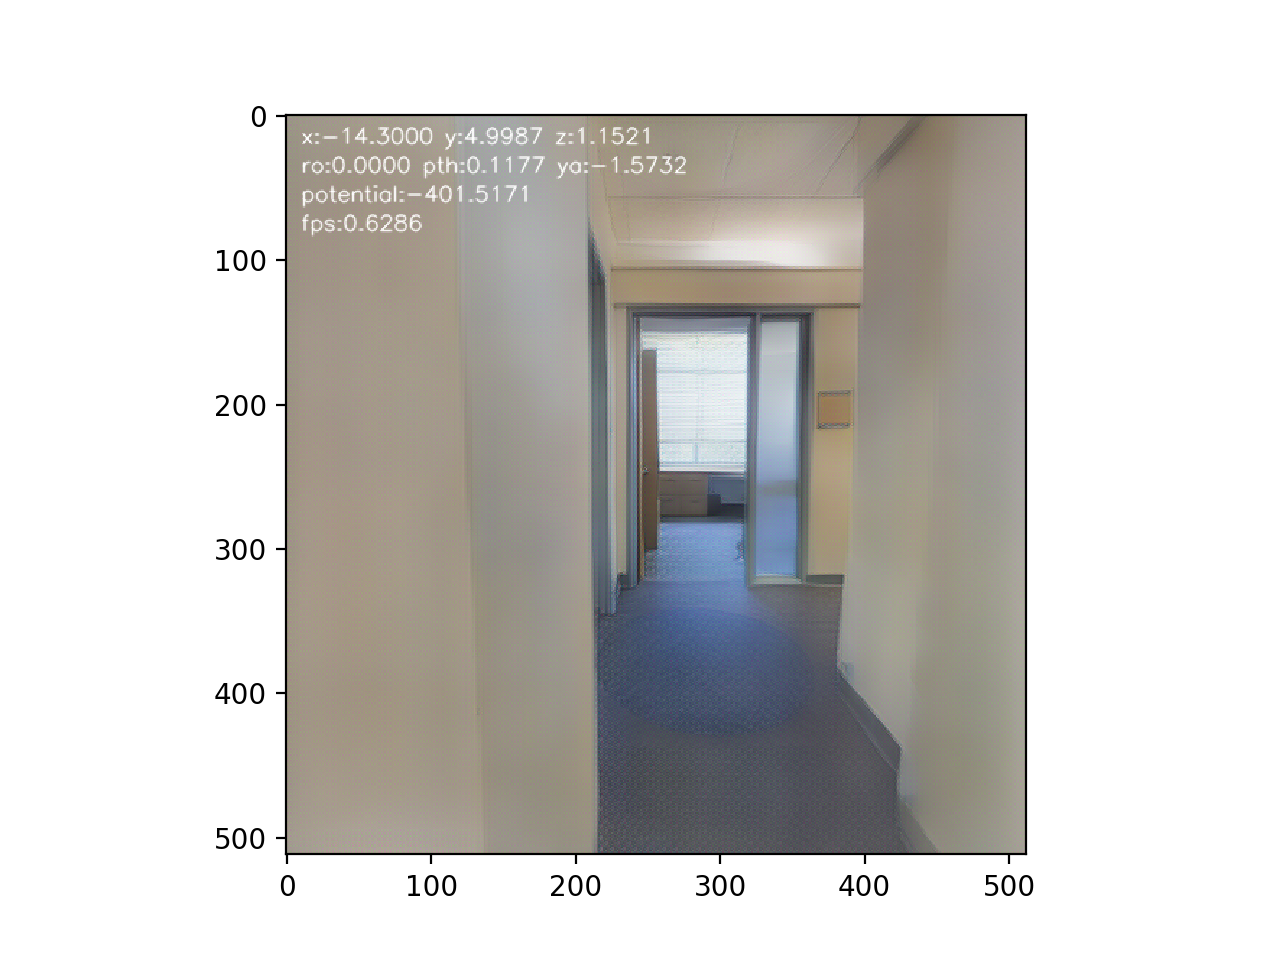

In [8]:
plt.imshow(obs['rgb_filled'])

In [10]:
keys_to_action = env.get_keys_to_action()

In [11]:
print(keys_to_action)
import sys

def press(event):
    print('press', event.key)
    sys.stdout.flush()
    if event.key == 'w':
        ax.clear()
        env.robot.move_forward()
        obs, rew, env_done, info = env.step(4)
        ax.imshow(obs['rgb_filled'])
        fig.canvas.draw()
    if event.key == 'a':
        ax.clear()
        env.robot.turn_left()
        obs, rew, env_done, info = env.step(4)
        ax.imshow(obs['rgb_filled'])
        fig.canvas.draw()
    if event.key == 'd':
        ax.clear()
        env.robot.turn_right()
        obs, rew, env_done, info = env.step(4)
        ax.imshow(obs['rgb_filled'])
        fig.canvas.draw()

{(119,): 0, (): 4, (115,): 1, (97,): 3, (100,): 2}


In [12]:
obs, rew, env_done, info = env.step(1)
plt.imshow(obs['rgb_filled'])

<IPython.core.display.Javascript object>


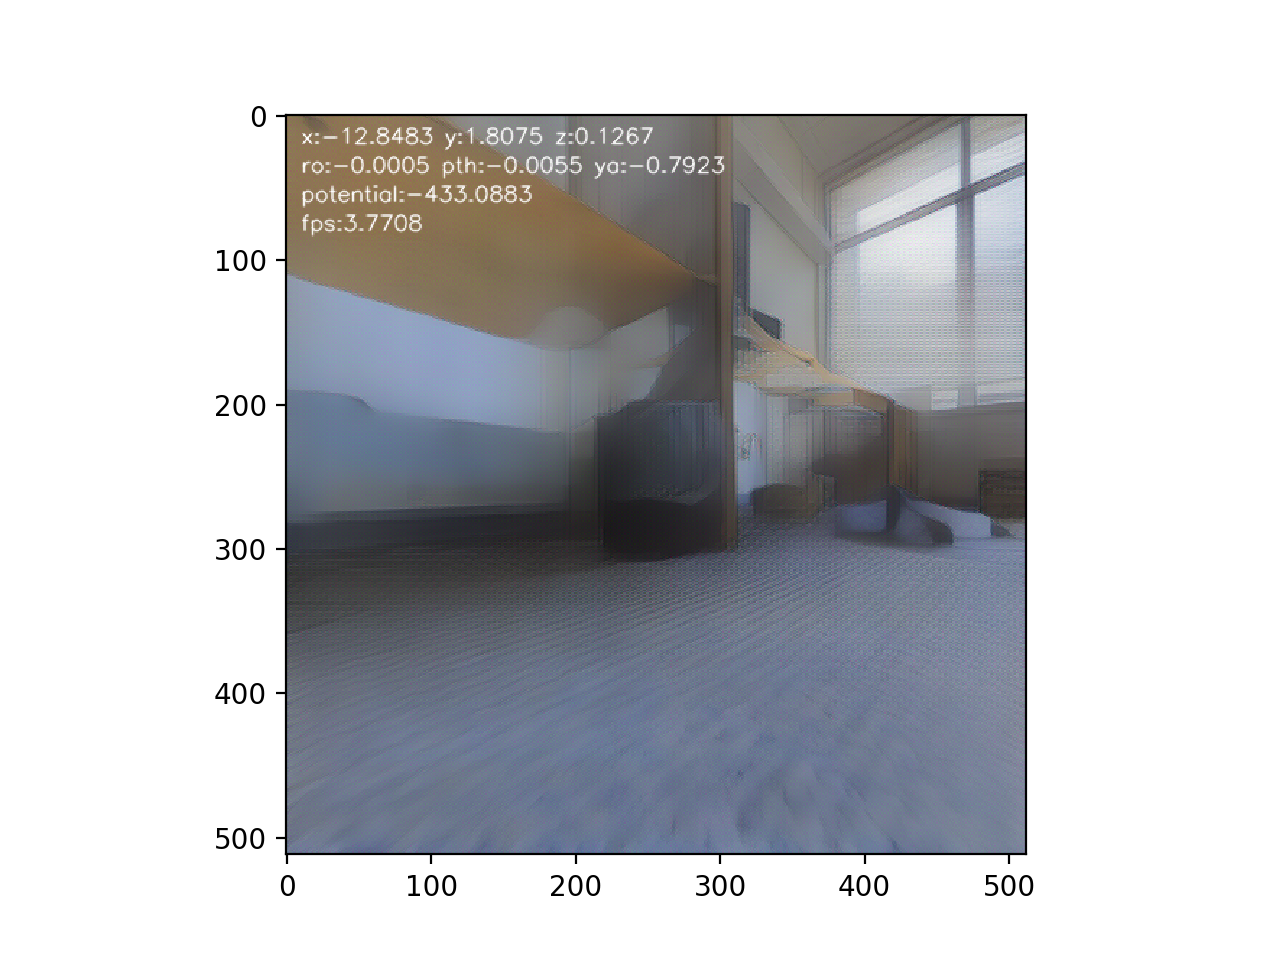

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.mpl_connect('key_press_event', press)
fig.canvas.draw()

for i in range(10):
    ax.clear()
    env.robot.move_forward()
    obs, rew, env_done, info = env.step(4)
    ax.imshow(obs['rgb_filled'])
    fig.canvas.draw()